In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
plt.style.use('seaborn-v0_8')  # or 'seaborn-darkgrid'
%matplotlib inline

In [7]:
# Define columns for LIAR dataset
columns = [
    'label', 'statement', 'subject', 'speaker', 'job_title', 
    'state_info', 'party_affiliation', 'barely_true_counts', 
    'false_counts', 'half_true_counts', 'mostly_true_counts', 
    'pants_on_fire_counts', 'context'
]

# Load the dataset
train_df = pd.read_csv('train.tsv', sep='\t', names=columns)
test_df = pd.read_csv('test.tsv', sep='\t', names=columns)
print("Dataset Shape:", train_df.shape)
train_df.head()


Dataset Shape: (10240, 13)


,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


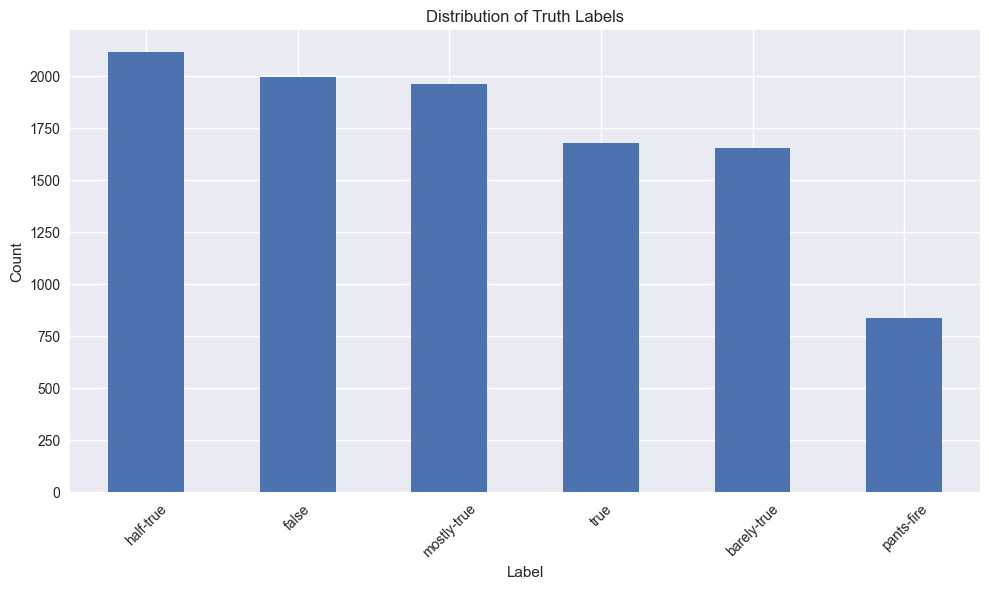

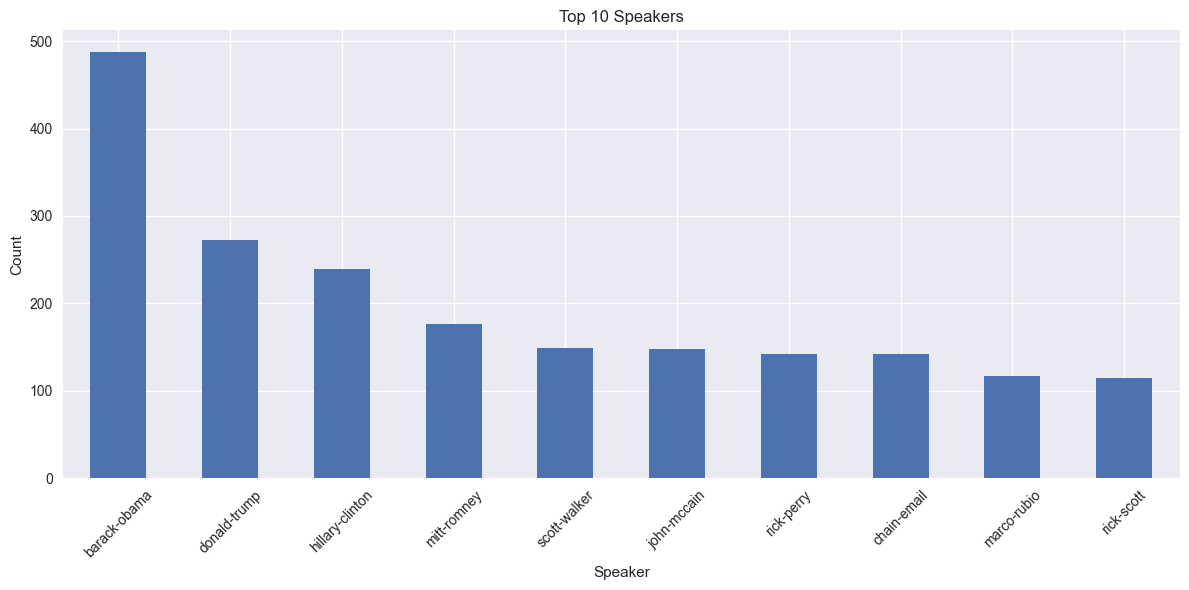

In [ ]:
# Cell 3 - Data Analysis
# Distribution of labels
plt.figure(figsize=(10, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Truth Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Speaker statistics
plt.figure(figsize=(12, 6))
train_df['speaker'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Speakers')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Cell 4 - Text Preprocessing Function
def preprocess_text(text_series):
    """Preprocess text data"""
    # Convert to lowercase
    text_series = text_series.str.lower()
    
    # Remove special characters and extra whitespace
    text_series = text_series.str.replace(r'[^\w\s]', ' ', regex=True)
    text_series = text_series.str.replace(r'\s+', ' ', regex=True)
    text_series = text_series.str.strip()
    
    return text_series

# Combine statement and context
train_df['text'] = train_df['statement'] + ' ' + train_df['context'].fillna('')
test_df['text'] = test_df['statement'] + ' ' + test_df['context'].fillna('')
# Clean text
train_df['text'] = preprocess_text(train_df['text'])
test_df['text'] = preprocess_text(test_df['text'])

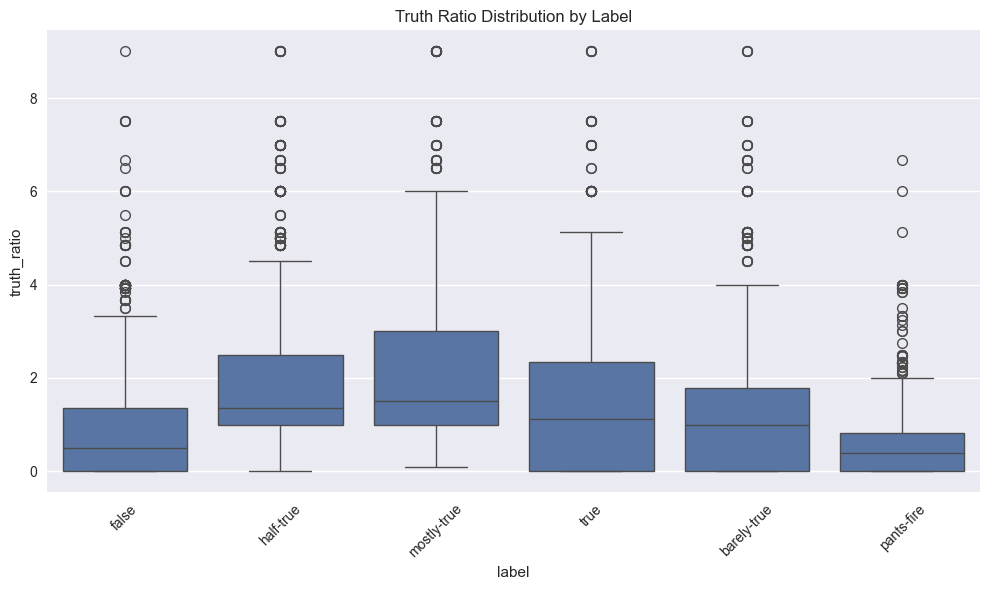

In [11]:
#Cell 5 - Feature Engineering
# Calculate truth ratio
def calculate_truth_ratio(df):
    return (df['mostly_true_counts'] + df['half_true_counts']) / \
           (df['false_counts'] + df['pants_on_fire_counts'] + 1)

train_df['truth_ratio'] = calculate_truth_ratio(train_df)
test_df['truth_ratio'] = calculate_truth_ratio(test_df)

# Visualize truth ratio distribution by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='truth_ratio', data=train_df)
plt.title('Truth Ratio Distribution by Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Cell 6 - Prepare Features and Labels
# Initialize vectorizer and label encoder
vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
label_encoder = LabelEncoder()

# Transform text features
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# Encode labels
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])

In [ ]:
#Cell 7 - Train Model
# Initialize and train the classifier
classifier = PassiveAggressiveClassifier(max_iter=50, C=1.0, random_state=42)
classifier.fit(X_train, y_train)

c:\Users\BELDHARI SATVICK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50, random_state=42)

Accuracy: 0.22

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       212
           1       0.25      0.25      0.25       249
           2       0.23      0.21      0.22       265
           3       0.21      0.22      0.21       241
           4       0.21      0.21      0.21        92
           5       0.20      0.23      0.21       208

    accuracy                           0.22      1267
   macro avg       0.22      0.22      0.22      1267
weighted avg       0.22      0.22      0.22      1267



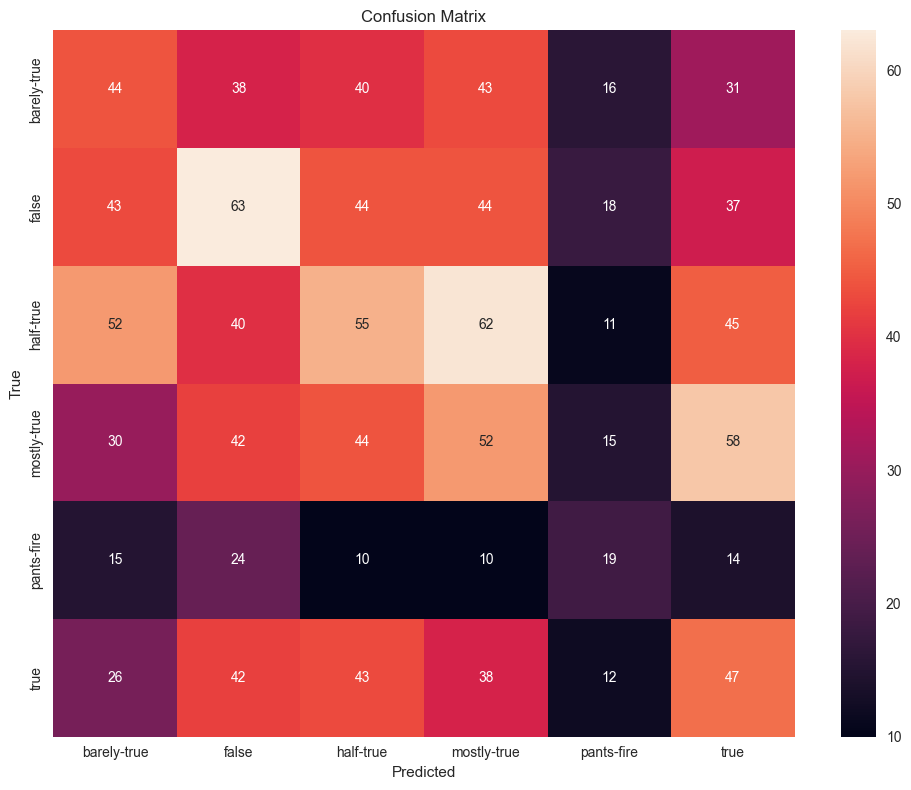

In [15]:
# Cell 8 - Evaluate Model
# Make predictions
y_pred = classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [16]:
# Cell 9 - Example Predictions
def predict_statement(statement, context=""):
    """Make prediction for a single statement"""
    # Prepare text
    text = preprocess_text(pd.Series([statement + ' ' + context]))
    # Transform text
    X = vectorizer.transform(text)
    # Predict
    pred = classifier.predict(X)
    # Convert prediction back to label
    return label_encoder.inverse_transform(pred)[0]

# Example statements
example_statements = [
    ("The unemployment rate has reached its lowest point in 50 years.", 
     "During economic policy speech"),
    ("The government is hiding aliens in Area 51.", 
     "Social media post"),
    ("Healthcare spending has increased by 20% since last year.", 
     "Budget report discussion")
]

print("Example Predictions:")
for statement, context in example_statements:
    prediction = predict_statement(statement, context)
    print(f"\nStatement: {statement}")
    print(f"Context: {context}")
    print(f"Prediction: {prediction}")

Example Predictions:

Statement: The unemployment rate has reached its lowest point in 50 years.
Context: During economic policy speech
Prediction: false

Statement: The government is hiding aliens in Area 51.
Context: Social media post
Prediction: half-true

Statement: Healthcare spending has increased by 20% since last year.
Context: Budget report discussion
Prediction: half-true


In [19]:
# More diverse example statements with contexts
test_cases = [
    ("The national debt has tripled in the last 10 years.", 
     "During budget debate"),
    
    ("90% of scientists agree that climate change is real.", 
     "Environmental conference"),
    
    ("Our state has the highest graduation rate in the country.", 
     "Education policy speech"),
    
    ("This new tax plan will save average families $5000 per year.", 
     "Campaign rally"),
    
    ("The crime rate in our city has decreased by 50% since last year.", 
     "Police department press conference")
]

# Test and analyze each statement
print("Detailed Analysis of Test Cases:\n")
for statement, context in test_cases:
    prediction = predict_statement(statement, context)
    
    # Transform the text to get feature importance
    text = preprocess_text(pd.Series([statement + ' ' + context]))
    X = vectorizer.transform(text)
    
    print(f"\nStatement: {statement}")
    print(f"Context: {context}")
    print(f"Predicted Label: {prediction}")
    
    # Get feature importance for this prediction
    important_words = []
    for word in statement.lower().split():
        if word in feature_names:
            idx = np.where(feature_names == word)[0][0]
            importance = classifier.coef_[0][idx]
            important_words.append((word, importance))
    
    if important_words:
        print("Key words and their importance:")
        for word, importance in sorted(important_words, key=lambda x: abs(x[1]), reverse=True)[:3]:
            print(f"- {word}: {importance:.4f}")

Detailed Analysis of Test Cases:


Statement: The national debt has tripled in the last 10 years.
Context: During budget debate
Predicted Label: mostly-true
Key words and their importance:
- debt: -1.5596
- national: 1.4730
- tripled: 0.9081

Statement: 90% of scientists agree that climate change is real.
Context: Environmental conference
Predicted Label: barely-true
Key words and their importance:
- scientists: -1.6326
- agree: 0.9653
- change: 0.8480

Statement: Our state has the highest graduation rate in the country.
Context: Education policy speech
Predicted Label: mostly-true
Key words and their importance:
- rate: -2.7674
- highest: 2.3634
- graduation: -1.1035

Statement: This new tax plan will save average families $5000 per year.
Context: Campaign rally
Predicted Label: pants-fire
Key words and their importance:
- average: -1.8959
- new: -1.5240
- save: -1.5186

Statement: The crime rate in our city has decreased by 50% since last year.
Context: Police department press confer


Top 10 words for label 'barely-true':
flowing: 10.7120
easier: 9.8387
damaging: 9.7109
india: -8.9471
06: 8.6862
sestak: 8.6741
suspend: -8.6451
pack: 8.6356
24th: 8.5838
assaulted: 8.4912

Top 10 words for label 'false':
tap: 11.5732
oshaughnessy: 11.2245
sharpe: 10.0426
destroyed: 9.5172
slave: 9.4701
directed: 9.3373
serves: 9.3128
popular: -9.2281
stayed: 9.2043
shariah: 8.9794

Top 10 words for label 'half-true':
substances: 10.7179
upgraded: 10.6308
derail: 10.4479
425: 10.0754
handpicked: 9.8711
101: -9.8531
manufacture: -9.7540
mammograms: 9.6497
avoided: 9.5031
counties: -9.4724

Top 10 words for label 'mostly-true':
doyles: 13.5555
neighbors: 11.7922
listed: 10.1657
keeps: 10.1480
dakota: 10.0289
graduating: 9.9219
steeper: 9.7975
strategy: 9.4769
averages: -9.4584
turn: 9.4073

Top 10 words for label 'pants-fire':
answered: 6.3835
landrieu: 5.6837
face: 5.5343
promise: -5.4997
deleted: 5.4991
socialists: 5.4539
schoolchildren: 5.1549
takeover: 4.9720
chain: 4.9364
590: 4.72

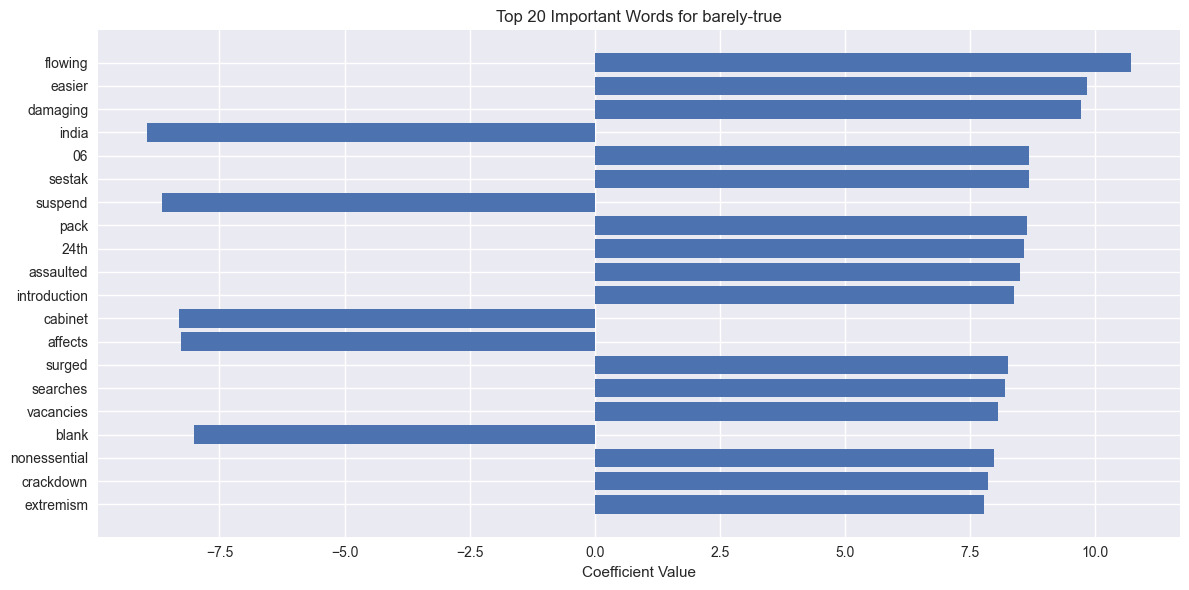

In [ ]:
# Cell 10 - Feature Importance Analysis
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get coefficients for each class
coef_per_class = classifier.coef_

# For each class, get the top important words
n_top_features = 10
for i, label in enumerate(label_encoder.classes_):
    print(f"\nTop {n_top_features} words for label '{label}':")
    
    # Get coefficients for this class
    class_coef = coef_per_class[i]
    
    # Get indices of top features
    top_indices = np.argsort(np.abs(class_coef))[-n_top_features:]
    
    # Print words and their coefficients
    for idx in top_indices[::-1]:
        print(f"{feature_names[idx]}: {class_coef[idx]:.4f}")

# Visualize top features for one class
plt.figure(figsize=(12, 6))
class_idx = 0  # Change this to visualize different classes
class_coef = coef_per_class[class_idx]
top_indices = np.argsort(np.abs(class_coef))[-20:]
plt.barh(feature_names[top_indices], class_coef[top_indices])
plt.title(f'Top 20 Important Words for {label_encoder.classes_[class_idx]}')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()